## Init


In [98]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict , StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix , classification_report ,make_scorer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

In [130]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [113]:
# Correct file path
file_path = '/content/drive/My Drive/Colab Notebooks/Ensemble Classifier/Data/Dataset1.csv'

# Load the dataset
df = pd.read_csv(file_path)

Label = 'Label'

# Display the first few rows
# df.head()


# Preprocess Data

# Correlation

In [123]:
# Correct file path
file_path = '/content/drive/My Drive/Colab Notebooks/Ensemble Classifier/Data/Dataset2.csv'

# Load the dataset
df = pd.read_csv(file_path)
Label = 'TenYearCHD'

In [124]:
# Example preprocessing steps (customize based on your dataset)
# Handle missing values
df = df.dropna()

# Encode categorical variables (if any)
df = pd.get_dummies(df)

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# Optionally, handle outliers or other specific preprocessing steps

# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Find features with high correlation
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  # You can adjust the threshold as needed
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print(high_corr_features)

# Drop the highly correlated features
df = df.drop(columns=high_corr_features)



{'diaBP', 'cigsPerDay'}


In [128]:

X = df.drop(columns=[Label])
y = df[Label].astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X.tail(5))
print(y_train.dtype)

          male       age  education  currentSmoker    BPMeds  prevalentStroke  \
4233  1.119755  0.052338  -0.958730       1.022114 -0.176901        -0.075987   
4234  1.119755  0.169149   0.997229       1.022114 -0.176901        -0.075987   
4237 -0.893053  0.285960   0.019249      -0.978364 -0.176901        -0.075987   
4238  1.119755 -1.115769   0.997229      -0.978364 -0.176901        -0.075987   
4239 -0.893053 -1.232580   0.997229       1.022114 -0.176901        -0.075987   

      prevalentHyp  diabetes   totChol     sysBP       BMI  heartRate  \
4233      1.486194 -0.166784  1.727136  2.111473  0.046051  -0.812255   
4234     -0.672860 -0.166784 -0.676947 -0.265830 -1.493908  -0.895729   
4237     -0.672860 -0.166784  0.729214  0.051143 -1.060948   0.356370   
4238      1.486194 -0.166784 -1.175908  0.390758 -0.044969  -0.728782   
4239     -0.672860 -0.166784 -0.926428  0.028502 -1.198708   0.773736   

       glucose  
4233  0.173511  
4234 -0.579599  
4237  1.052139  
4238 -

# BaggingClassifier

Accuracy: 0.83
Precision: 0.79
Recall: 0.83
F1 Score: 0.79

Cross-Validation Results:
Cross-Validation Accuracy: 0.84
Cross-Validation Precision: 0.79
Cross-Validation Recall: 0.84
Cross-Validation F1 Score: 0.80


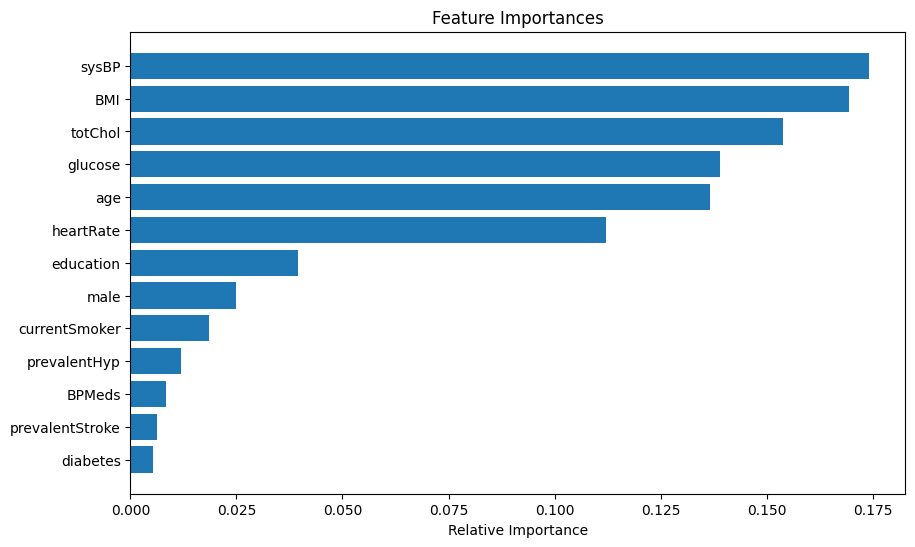

In [131]:
# Bagging Classifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

# Extract cross-validation results
cv_accuracy = cv_results['test_accuracy'].mean()
cv_precision = cv_results['test_precision_weighted'].mean()
cv_recall = cv_results['test_recall_weighted'].mean()
cv_f1 = cv_results['test_f1_weighted'].mean()

print("\nCross-Validation Results:")
print(f'Cross-Validation Accuracy: {cv_accuracy:.2f}')
print(f'Cross-Validation Precision: {cv_precision:.2f}')
print(f'Cross-Validation Recall: {cv_recall:.2f}')
print(f'Cross-Validation F1 Score: {cv_f1:.2f}')


# Store results for comparison
results = []
# Aggregate cross-validation results for Bagging
results.append({
    'Model': 'Bagging',
    'Accuracy': cv_accuracy,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1 Score': cv_f1
    })


# Feature Importances Visualization (if available)
if hasattr(model.estimators_[0], 'feature_importances_'):
    importances = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
else:
    print("The base estimator does not have feature importances.")

# DecisionTreeClassifier

In [132]:
# Initialize different Decision Trees
tree_models = [
    ('Shallow Tree (max_depth=3)', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('Deep Tree (max_depth=None)', DecisionTreeClassifier(max_depth=None, random_state=42)),
    ('Less Aggressive Split (min_samples_split=4)', DecisionTreeClassifier(min_samples_split=4, random_state=42)),
    ('Entropy Criterion', DecisionTreeClassifier(criterion='entropy', random_state=42)),
    ('Moderate Depth (max_depth=6)', DecisionTreeClassifier(max_depth=6, random_state=42))
]



for name, tree in tree_models:
    # Perform cross-validation
    cv_results_tree = cross_validate(tree, X, y, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

    # Aggregate cross-validation results
    results.append({
        'Model': name,
        'Accuracy': cv_results_tree['test_accuracy'].mean(),
        'Precision': cv_results_tree['test_precision_weighted'].mean(),
        'Recall': cv_results_tree['test_recall_weighted'].mean(),
        'F1 Score': cv_results_tree['test_f1_weighted'].mean()
    })





## Comparsion


Comparison of Validation Metrics:
                                         Model  Accuracy  Precision    Recall  \
0                                      Bagging  0.839804   0.785457  0.839804   
1                   Shallow Tree (max_depth=3)  0.844725   0.776699  0.844725   
2                   Deep Tree (max_depth=None)  0.752329   0.766953  0.752329   
3  Less Aggressive Split (min_samples_split=4)  0.766270   0.770469  0.766270   
4                            Entropy Criterion  0.772824   0.772862  0.772824   
5                 Moderate Depth (max_depth=6)  0.834610   0.780474  0.834610   

   F1 Score  
0  0.795295  
1  0.784777  
2  0.759285  
3  0.768288  
4  0.772614  
5  0.791957  


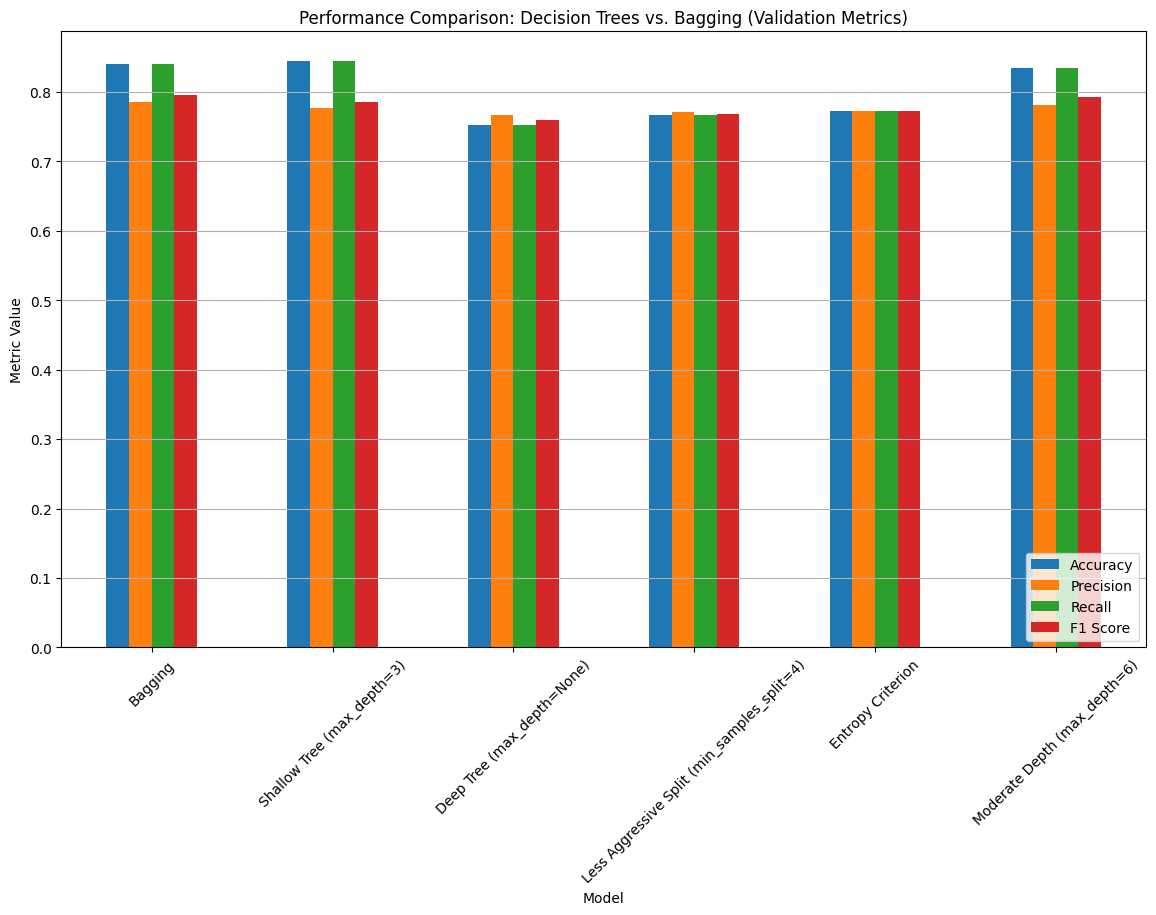

In [135]:
# Create a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Print results
print("\nComparison of Validation Metrics:")
print(results_df)

# Plot comparison
results_df.set_index('Model').plot(kind='bar', figsize=(14, 8))
plt.title('Performance Comparison: Decision Trees vs. Bagging (Validation Metrics)')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

# Random Forest

In [38]:
# Build the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Perform cross-validation
cv_results = cross_validate(rf, X, y, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

# Extract cross-validation results
cv_accuracy = cv_results['test_accuracy'].mean()
cv_precision = cv_results['test_precision_weighted'].mean()
cv_recall = cv_results['test_recall_weighted'].mean()
cv_f1 = cv_results['test_f1_weighted'].mean()

print("\nCross-Validation Results:")
print(f'Cross-Validation Accuracy: {cv_accuracy:.2f}')
print(f'Cross-Validation Precision: {cv_precision:.2f}')
print(f'Cross-Validation Recall: {cv_recall:.2f}')
print(f'Cross-Validation F1 Score: {cv_f1:.2f}')




Cross-Validation Results:
Cross-Validation Accuracy: 0.87
Cross-Validation Precision: 0.93
Cross-Validation Recall: 0.87
Cross-Validation F1 Score: 0.87


# Visualize the trees

t Index(['Feature 1', 'Feature 2'], dtype='object')


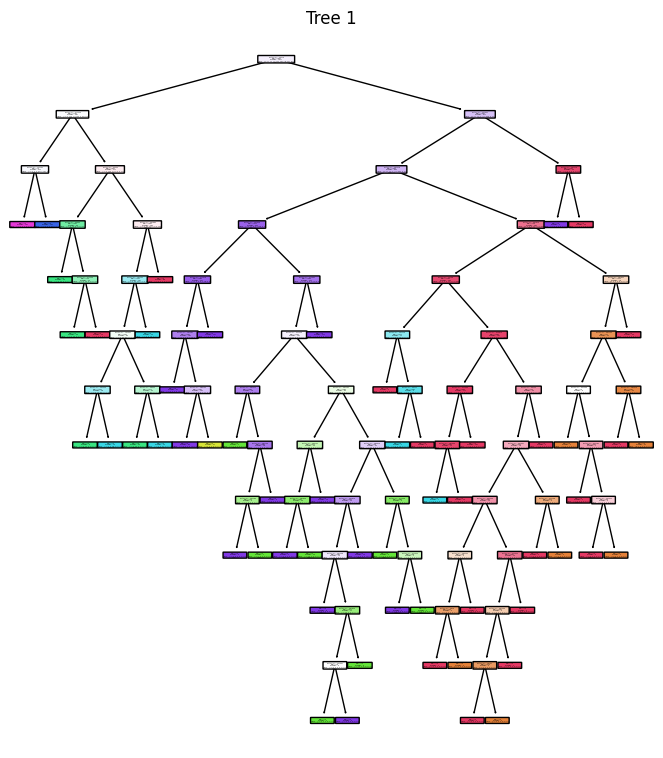

In [86]:
# Visualize the model output (5 random trees)
classes = df[Label].astype(str).unique()
plt.figure(figsize=(20, 15))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plot_tree(rf.estimators_[i], filled=True, feature_names=X.columns, class_names=classes, rounded=True)
    plt.title(f'Tree {i + 1}')
plt.tight_layout()
plt.show()

# Label Comparison


In [41]:
# Convert class names to strings
class_names = sorted(y.unique().astype(str))

# Number of samples to visualize
num_samples = 20

# Store results
results = []

# Loop through multiple samples
for sample_index in range(num_samples):
    sample = X_test.iloc[sample_index:sample_index+1]

    # Get predictions from the first 5 trees in the forest
    tree_predictions = [tree.predict(sample)[0] for tree in rf.estimators_[:5]]

    # Get the Random Forest prediction
    forest_prediction = rf.predict(sample)[0]

    # Store the result
    results.append({
        'Sample Index': sample_index,
        'Tree Predictions': tree_predictions,
        'Forest Prediction': forest_prediction,
        'True Label': y_test.iloc[sample_index]
    })

# Print the results
for result in results:
    print(f"\nSample Index: {result['Sample Index']}")
    print(f"Tree Predictions: {result['Tree Predictions']}")
    print(f"Random Forest Prediction: {result['Forest Prediction']}")
    print(f"True Label: {result['True Label']}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without


Sample Index: 0
Tree Predictions: [6.0, 6.0, 6.0, 6.0, 6.0]
Random Forest Prediction: 6
True Label: 6

Sample Index: 1
Tree Predictions: [2.0, 2.0, 2.0, 2.0, 2.0]
Random Forest Prediction: 2
True Label: 2

Sample Index: 2
Tree Predictions: [8.0, 8.0, 8.0, 8.0, 8.0]
Random Forest Prediction: 8
True Label: 8

Sample Index: 3
Tree Predictions: [1.0, 1.0, 1.0, 1.0, 1.0]
Random Forest Prediction: 1
True Label: 1

Sample Index: 4
Tree Predictions: [2.0, 2.0, 6.0, 2.0, 2.0]
Random Forest Prediction: 2
True Label: 2

Sample Index: 5
Tree Predictions: [3.0, 3.0, 3.0, 3.0, 8.0]
Random Forest Prediction: 3
True Label: 3

Sample Index: 6
Tree Predictions: [0.0, 0.0, 0.0, 0.0, 0.0]
Random Forest Prediction: 0
True Label: 0

Sample Index: 7
Tree Predictions: [2.0, 2.0, 2.0, 2.0, 2.0]
Random Forest Prediction: 2
True Label: 2

Sample Index: 8
Tree Predictions: [3.0, 3.0, 3.0, 3.0, 3.0]
Random Forest Prediction: 3
True Label: 3

Sample Index: 9
Tree Predictions: [6.0, 6.0, 6.0, 6.0, 6.0]
Random Fores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

# AdaBoost

In [53]:
from sklearn.preprocessing import LabelEncoder
X = df.drop(Label, axis=1)
y = df[Label].astype(str)  # Ensure y is treated as strings

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X = pd.get_dummies(X, drop_first=True)

# Encode target variable if not already numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [55]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak classifier (stump)

# Train the AdaBoost model with more than 8 estimators (e.g., 50)
n_estimators = 50
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)
ada.fit(X_train, y_train)

# Predict on the test set
y_pred = ada.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Final Accuracy: {accuracy:.2f}')

# Function to plot data points and classifier regions
def plot_decision_boundary(ax, estimator, X, y, title, plot_data=True):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    if plot_data:
        scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.Paired)
        unique_labels = np.unique(y)
        # Map unique labels to legend entries
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Paired(i), markersize=10)
                           for i in range(len(unique_labels))]
        ax.legend(legend_elements, le.inverse_transform(unique_labels), title="Classes")
    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Visualize selected steps
steps_to_plot = [1, 2, 4, 8, 16, 32, n_estimators]  # Steps to visualize

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('AdaBoost Weak Classifiers and Performance Improvement', fontsize=16)

# Iterate over selected steps and plot decision boundaries
for i, step in enumerate(steps_to_plot):
    if step > n_estimators:
        continue
    # Use all estimators up to the current step
    ada_step = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=step, random_state=42)
    ada_step.fit(X_train, y_train)

    plot_decision_boundary(axs[i // 3, i % 3], ada_step, X_train, y_train, f'Step {step}')
    y_pred_step = ada_step.predict(X_train)
    accuracy_step = accuracy_score(y_train, y_pred_step)
    print(f'Step {step} Accuracy: {accuracy_step:.2f}')

# Plot the final AdaBoost classifier (n_estimators)
plot_decision_boundary(axs[2, 2], ada, X_train, y_train, f'Final (n_estimators={n_estimators})')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

Output hidden; open in https://colab.research.google.com to view.

In [57]:
# Confusion matrix

Confusion Matrix:
[[  0   0   0   0  21   0   0   0   0]
 [  0   0   0   0   0   0  39   0   0]
 [  0   0   0   0   0   0  39   0   0]
 [  0   0   0  51  15   1   0   0   0]
 [  0   0   0   2  58   0   0   0   0]
 [  0   0   0   0   0 101   0   0   0]
 [  0   0   0   0   0   0 256   0   0]
 [  0   0   0   0   0  93   0   0   0]
 [  0   0   0   0 234   0   0   0   0]]


# Stacked Learner

## KNN

Cross-Validated Accuracy: 1.00 ± 0.00
Cross-Validated Precision: 1.00 ± 0.00
Cross-Validated Recall: 1.00 ± 0.00
Cross-Validated F1 Score: 1.00 ± 0.00

Test Set Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 21   0   0   0   0   0   0   0   0]
 [  0  39   0   0   0   0   0   0   0]
 [  0   0  39   0   0   0   0   0   0]
 [  0   0   0  67   0   0   0   0   0]
 [  0   0   0   0  60   0   0   0   0]
 [  0   0   0   0   0 101   0   0   0]
 [  0   0   0   0   0   0 256   0   0]
 [  0   0   0   0   0   0   0  93   0]
 [  0   0   0   0   0   0   0   0 234]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        60
           5       1.00      1.00      1.00       10

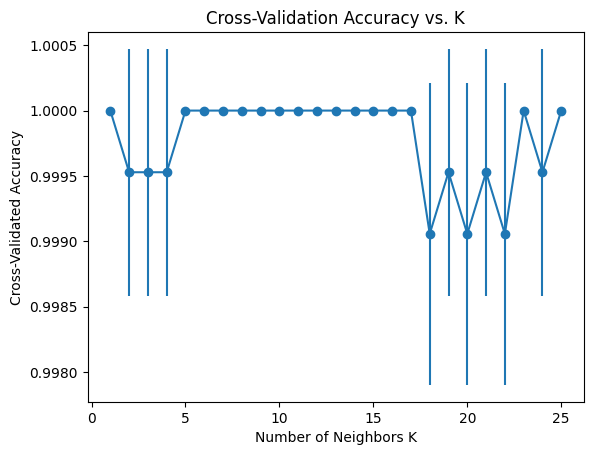

In [63]:
k = 5  # You can choose an appropriate value for k
knn = KNeighborsClassifier(n_neighbors=k)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute metrics
accuracy_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='precision_macro')
recall_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='recall_macro')
f1_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='f1_macro')

# Print cross-validated metrics
print(f"Cross-Validated Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Cross-Validated Precision: {np.mean(precision_scores):.2f} ± {np.std(precision_scores):.2f}")
print(f"Cross-Validated Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}")
print(f"Cross-Validated F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")

# Step 5: Evaluate the model on the test set
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Find the best k using cross-validation
k_range = range(1, 26)
mean_scores = []
std_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

best_k = k_range[np.argmax(mean_scores)]
print(f"\nBest k: {best_k}")

plt.errorbar(k_range, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Accuracy vs. K')
plt.show()

# Stacked Learner

## Base Models

In [88]:


# Initialize base models
base_models = [
    ('log_reg', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('svc', SVC(probability=True))
]

# Fit base models
for name, model in base_models:
    model.fit(X_train, y_train)

# Generate predictions for the training set
train_predictions = np.zeros((X_train.shape[0], len(base_models)))
test_predictions = np.zeros((X_test.shape[0], len(base_models)))

for i, (name, model) in enumerate(base_models):
    train_predictions[:, i] = model.predict(X_train)
    test_predictions[:, i] = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
from sklearn.linear_model import LogisticRegression

# Meta-model
meta_model = LogisticRegression(max_iter=1000)

# Fit the meta-model on base model predictions
meta_model.fit(train_predictions, y_train)
# Evaluate
meta_predictions = meta_model.predict(test_predictions)


# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scorers with zero_division=0
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0)
}

# Perform cross-validation
accuracy_scores = cross_val_score(meta_model, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(meta_model, X_train, y_train, cv=cv, scoring=scoring['precision_macro'])
recall_scores = cross_val_score(meta_model, X_train, y_train, cv=cv, scoring=scoring['recall_macro'])
f1_scores = cross_val_score(meta_model, X_train, y_train, cv=cv, scoring=scoring['f1_macro'])

# Print results
print(f'Accuracy scores: {accuracy_scores}')
print(f'Precision scores: {precision_scores}')
print(f'Recall scores: {recall_scores}')
print(f'F1 scores: {f1_scores}')

# Optionally, calculate mean scores
print(f'Mean Accuracy: {np.mean(accuracy_scores):.4f}')
print(f'Mean Precision: {np.mean(precision_scores):.4f}')
print(f'Mean Recall: {np.mean(recall_scores):.4f}')
print(f'Mean F1: {np.mean(f1_scores):.4f}')


Accuracy scores: [0.84615385 0.86153846 0.84835165 0.81718062 0.81718062]
Precision scores: [0.58622417 0.59051772 0.5684214  0.54390999 0.5453587 ]
Recall scores: [0.60328472 0.61071753 0.59926819 0.56739622 0.54333522]
F1 scores: [0.59291758 0.59823037 0.58229132 0.55329244 0.53734228]
Mean Accuracy: 0.8381
Mean Precision: 0.5669
Mean Recall: 0.5848
Mean F1: 0.5728
